В качестве распределения с конечными первыми пятью моментами и бесконечными остальными возьмем распределение с плотностью:

$p(x) = \frac{5}{x^6} I(x \in [1, \infty ))$

Очевидно, что это действительно функция плотности и что она нам подходит.

In [82]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [83]:
# Создадим класс, дочерний классу непрерывных распределений,
# который соответствует нашему распределению
class my_dist_gen(sts.rv_continuous):
    def _pdf(self, x):
        return 5 / (x**6) * (x >= 1)

In [85]:
# Сгенерируем из нашего распределения выборку размера N
N = 10**4
dist = my_dist_gen(a=1,name='dist')
X = np.array(dist.rvs(size=N))

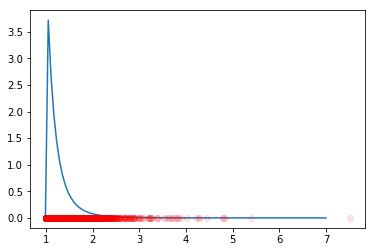

In [86]:
# Построим график плотности и нанесем на ось у точки из нашей выборки 
x = np.linspace(0.99, 7, 100)
plt.plot(x, dist.pdf(x))
plt.plot(X, np.zeros(N), 'ro', alpha=0.1)

In [87]:
# Для каждого n <= N посчитаем выборочную дисперсию
# выборки из первых n элементов
s = [np.mean((X[:n])**2) - (np.mean(X[:n]))**2 for n in range(1,N)]

Найдем дисперсию нашего распределения:

$ p_{\xi}(x) = \frac{5}{x^6} I(x \in [1, \infty )) $

$E \xi = \int\limits_{-\infty}^{+\infty} x \cdot p_{\xi}(x) dx = \frac{5}{4}$

$E \xi^2 = \int\limits_{-\infty}^{+\infty} x^2 \cdot p_{\xi}(x) dx = \frac{5}{3}$

$D \xi = E \xi^2 - (E \xi)^2 = \frac{5}{48}$

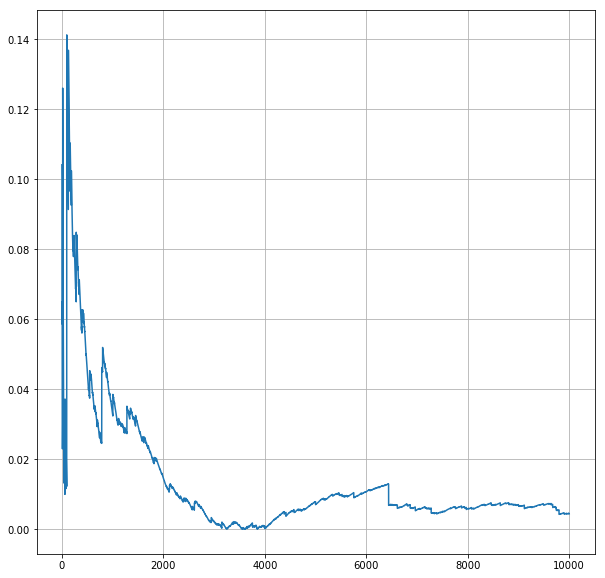

In [90]:
# Построим график модуля разности выборочной дисперсии и теоретической
plt.figure(figsize=(10,10))
plt.plot(range(1,N), abs(np.array(s) - 5/48))
plt.grid()

Видим, что выборочная дисперсия достаточно хорошо сходится к дисперсии распределения

In [106]:
# Проведем аналогичное исследование для стандартного распределения Коши
# Сгенерируем выборку размера N
cauchy_dist = sts.cauchy()
cauchy_sample = np.array(cauchy_dist.rvs(N))

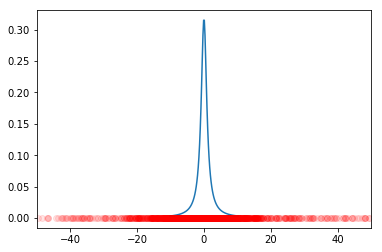

In [107]:
# Построим график плотности и нанесем на ось у точки нашей выборки 
x = np.linspace(-10, 10, 100)
plt.xlim(-50, 50)
plt.plot(x, sts.cauchy.pdf(x))
plt.plot(cauchy_sample, np.zeros(N), 'ro', alpha=0.1)

In [103]:
# Посчитаем выборочную дисперсию для всех начальных отрезков нашей выборки
cauchy_s = [np.mean(np.array(cauchy_sample[:n])**2) - (np.mean(cauchy_sample[:n]))**2 for n in range(1,N) ]

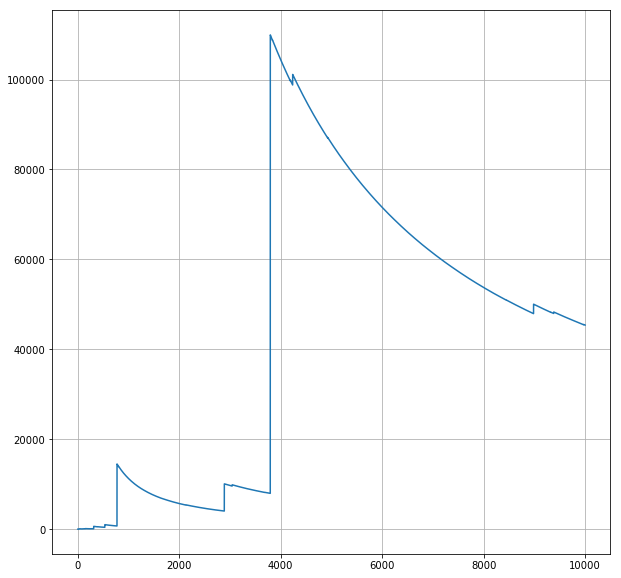

In [104]:
# Построим график оценки дисперсии
plt.figure(figsize=(10,10))
plt.plot(range(1,N), np.array(cauchy_s))
plt.grid()

Как видим, действительно, оценка дисперсии не сходится.